# SOSE Surface Forcing

5-year average (2008-2012) of surface wind stresses, heat and freshwater fluxes that are used in SOSE dataset are analyzed. These are used for preparation of zonally uniform forcing profiles for running idealized high-resolution simulations to study the Southern Ocean dynamics using MOM6 channel model. 

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from xgcm import Grid
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import glob, os

In [2]:
# Read files
ppdir = "/Volumes/Seagate_Hemant2/Work/Ocean/2019_SOSE/Dataset/"
ds = xr.open_mfdataset(ppdir + "*2008to2012.nc")

print(ds)   

<xarray.Dataset>
Dimensions:   (XC: 1080, XG: 1080, YC: 294, YG: 294, Z: 52, time: 118)
Coordinates:
  * time      (time) datetime64[ns] 2008-01-31T10:00:00 ... 2012-12-30T12:00:00
    iter      (time) float64 dask.array<chunksize=(118,), meta=np.ndarray>
  * XC        (XC) float32 0.16666667 0.5 0.8333333 ... 359.5 359.83334
  * YC        (YC) float32 -77.96525 -77.89555 ... -30.089203 -29.789328
  * Z         (Z) float32 -2.1 -6.7 -12.15 -18.55 ... -5000.0 -5400.0 -5800.0
    Depth     (YC, XC) float32 dask.array<chunksize=(294, 1080), meta=np.ndarray>
    rA        (YC, XC) float32 dask.array<chunksize=(294, 1080), meta=np.ndarray>
    drF       (Z) float32 dask.array<chunksize=(52,), meta=np.ndarray>
    hFacC     (Z, YC, XC) float32 dask.array<chunksize=(52, 294, 1080), meta=np.ndarray>
  * XG        (XG) float32 0.0 0.33333334 0.6666667 ... 359.33334 359.66666
    dxC       (YC, XG) float32 dask.array<chunksize=(294, 1080), meta=np.ndarray>
    rAw       (YC, XG) float32 dask.arr

In [6]:
ds['SIatmFW']

<xarray.DataArray 'SIatmFW' (time: 118, YC: 294, XC: 1080)>
dask.array<where, shape=(118, 294, 1080), dtype=float32, chunksize=(118, 294, 1080), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2008-01-31T10:00:00 ... 2012-12-30T12:00:00
    iter     (time) float64 dask.array<chunksize=(118,), meta=np.ndarray>
  * XC       (XC) float32 0.16666667 0.5 0.8333333 ... 359.16666 359.5 359.83334
  * YC       (YC) float32 -77.96525 -77.89555 ... -30.089203 -29.789328
    Depth    (YC, XC) float32 dask.array<chunksize=(294, 1080), meta=np.ndarray>
    rA       (YC, XC) float32 dask.array<chunksize=(294, 1080), meta=np.ndarray>
Attributes:
    units:          kg/m^2/s
    long_name:      Net freshwater flux from atmosphere & land (+=down)
    standard_name:  SIatmFW

In [7]:
ds['SIempmr']

<xarray.DataArray 'SIempmr' (time: 118, YC: 294, XC: 1080)>
dask.array<where, shape=(118, 294, 1080), dtype=float32, chunksize=(118, 294, 1080), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2008-01-31T10:00:00 ... 2012-12-30T12:00:00
    iter     (time) float64 dask.array<chunksize=(118,), meta=np.ndarray>
  * XC       (XC) float32 0.16666667 0.5 0.8333333 ... 359.16666 359.5 359.83334
  * YC       (YC) float32 -77.96525 -77.89555 ... -30.089203 -29.789328
    Depth    (YC, XC) float32 dask.array<chunksize=(294, 1080), meta=np.ndarray>
    rA       (YC, XC) float32 dask.array<chunksize=(294, 1080), meta=np.ndarray>
Attributes:
    units:          kg/m^2/s
    long_name:      Ocean surface freshwater flux, > 0 increases salt
    standard_name:  SIempmr

$\Large \text{Time-mean Plots}$ 

First, we plot the time-averaged wind forcing, heat and fresh water fluxes. 
These are then used to construct zonally-averaged profiles in Kerguelen plateau region (between lon 30$^o$ and 110$^o$). 

In addition, we also look at the depth profiles of temperature and salinity. These would be helpful in constructing vertical profiles of temperature and salinity in the sponge region at the northern boundary. 

The SOSE dataset is available at http://sose.ucsd.edu

In [3]:
def SOSE_plot_mono(ax, da, vmin=-999, vmax=999, vstep=1,
                        lon='XC', lat='YC', landcolor=1.,
                        cmap='RdBu_r', title='what is it?'):
    """ standard global plot for the Southern Ocean """

    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER 
    
    # contours
    contours = np.arange(vmin, vmax+vstep, vstep)

    cf = da.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),
                          x=lon, y=lat,
                          levels=contours,
                          vmin=vmin, vmax=vmax,
                          add_labels=False,
                          add_colorbar=False,
                          cmap=cmap)
    # add separate colorbar
    cb = plt.colorbar(cf, ax=ax, format='%.1e', extend='both', shrink=0.9)
    cb.ax.tick_params(labelsize=12)
    #cb.formatter.set_scientific(True)
    #cb.formatter.set_powerlimits((-1, 1))
    
    #fig = plt.figure(figsize=[16,10])
    #ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-180, 180, -75, -28], crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.LAND, zorder=100, edgecolor='k')

    # parallels/meridiens
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.ylocator = mticker.FixedLocator([-80, -70, -60, -50, -40, -30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12, 'color': 'black'}
    gl.ylabel_style = {'size': 12, 'color': 'black'}
    
    #ax.set_adjustable('datalim')
    
    
    ax.set_aspect(1.3)

    # title
    _ = plt.title(title, fontsize=16)
    return fig


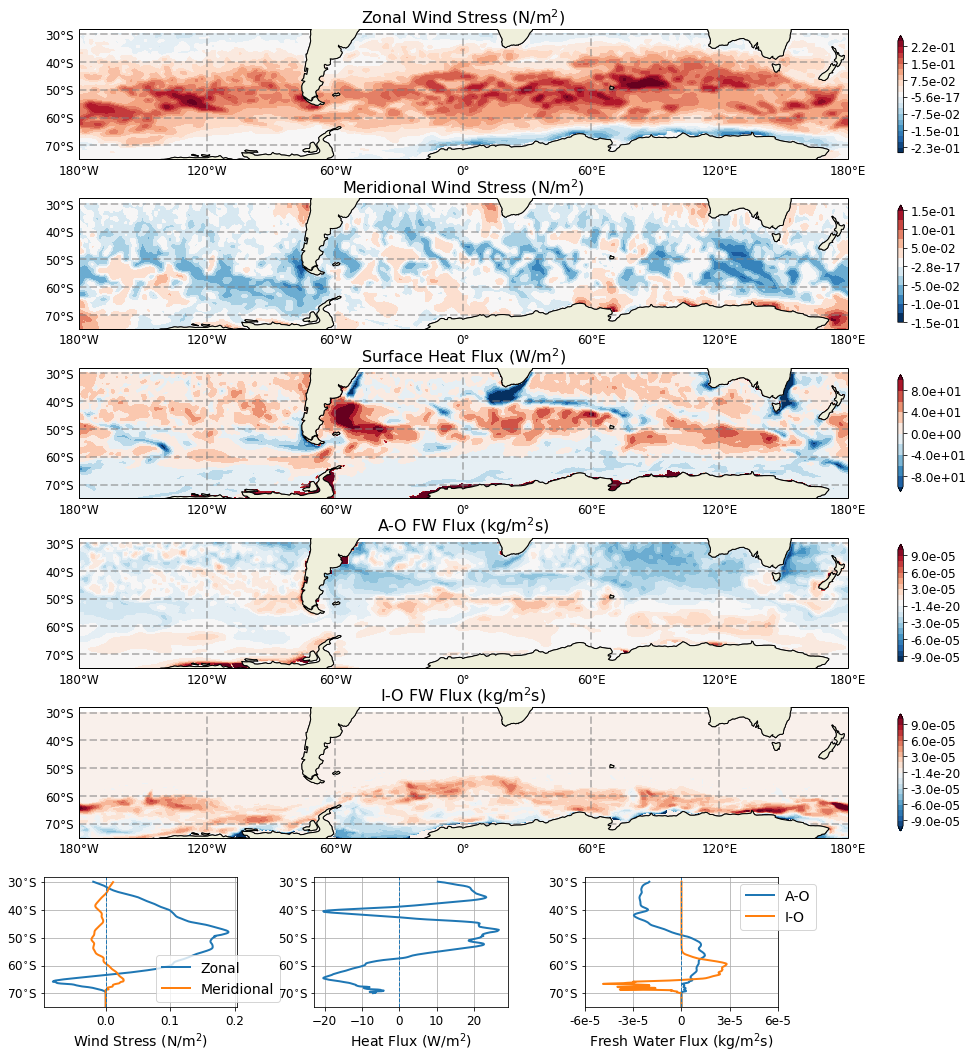

In [8]:
grid = plt.GridSpec(6, 4, wspace=0.4, hspace=0.3)

fig = plt.figure(figsize=[18,18])
ax = fig.add_subplot(grid[0, 0:], projection=ccrs.PlateCarree())
_ = SOSE_plot_mono(ax, ds['oceTAUX'].mean('time'), vmin=-0.25, vmax=0.25, vstep=0.025,
                   lon='XG', lat='YC', landcolor=2., cmap='RdBu_r', title='Zonal Wind Stress (N/m$^2$)')

ax = fig.add_subplot(grid[1, 0:], projection=ccrs.PlateCarree())
_ = SOSE_plot_mono(ax, ds['oceTAUY'].mean('time'), vmin=-0.15, vmax=0.15, vstep=0.025,
                   lon='XC', lat='YG', landcolor=2., cmap='RdBu_r', title='Meridional Wind Stress (N/m$^2$)')

ax = fig.add_subplot(grid[2, 0:], projection=ccrs.PlateCarree())
_ = SOSE_plot_mono(ax, (ds['TFLUX']).mean('time'), vmin=-100, vmax=100, vstep=20,
                   lon='XC', lat='YC', landcolor=2., cmap='RdBu_r', title='Surface Heat Flux (W/m$^2$)')

A_O = (ds['SIatmFW'] - ds['SIsnPrcp']) # see Abernathey et al. 2016, Nature GeoSci.
ax = fig.add_subplot(grid[3, 0:], projection=ccrs.PlateCarree())
_ = SOSE_plot_mono(ax, A_O.mean('time'), vmin=-1e-4, vmax=1e-4, vstep=1e-5,
                   lon='XC', lat='YC', landcolor=2., cmap='RdBu_r', title='A-O FW Flux (kg/m$^2$s)')

I_O = - ds['SIempmr'] - A_O # SIepmr is -ve into the ocean, so used -ve to be consistent
ax = fig.add_subplot(grid[4, 0:], projection=ccrs.PlateCarree())
_ = SOSE_plot_mono(ax, I_O.mean('time'), vmin=-1e-4, vmax=1e-4, vstep=1e-5,
                   lon='XC', lat='YC', landcolor=2., cmap='RdBu_r', title='I-O FW Flux (kg/m$^2$s)')

ax = fig.add_subplot(grid[5, 0])
ax.plot(ds['oceTAUX'].sel(XG = slice(30,110)).mean(['time','XG']),ds['YC'],lw=2, label='Zonal')
ax.plot(ds['oceTAUY'].sel(XC = slice(30,110)).mean(['time','XC']),ds['YG'],lw=2, label='Meridional')
ax.set_xlabel('Wind Stress (N/m$^2$)',fontsize=14)
plt.yticks([-70, -60, -50, -40, -30], 
           ['70$^{\circ}$S', '60$^{\circ}$S', '50$^{\circ}$S', '40$^{\circ}$S', '30$^{\circ}$S'],fontsize=12)
ax.set_ylim([-75,-28])
plt.xticks(fontsize=12)
ax.axvline(x=0, lw=1, ls='--')
plt.grid()
ax.legend(loc='upper center', bbox_to_anchor=(0.9, 0.45), fontsize=14)

ax = fig.add_subplot(grid[5, 1])
ax.plot((ds['TFLUX']*ds['Depth']/ds['Depth']).sel(XC = slice(30,110)).mean(['time','XC']),ds['YC'],lw=2)
ax.set_xlabel('Heat Flux (W/m$^2$)',fontsize=14)
plt.yticks([-70, -60, -50, -40, -30], 
           ['70$^{\circ}$S', '60$^{\circ}$S', '50$^{\circ}$S', '40$^{\circ}$S', '30$^{\circ}$S'],fontsize=12)
ax.set_ylim([-75,-28])
plt.xticks(fontsize=12)
plt.grid()
ax.axvline(x=0, lw=1, ls='--')

ax = fig.add_subplot(grid[5, 2])
ax.plot(A_O.sel(XC = slice(30,110)).mean(['time','XC']),ds['YC'],lw=2, label='A-O')
ax.plot(I_O.sel(XC = slice(30,110)).mean(['time','XC']),ds['YC'],lw=2, label='I-O')
ax.set_xlabel('Fresh Water Flux (kg/m$^2$s)',fontsize=14)
plt.yticks([-70, -60, -50, -40, -30], 
           ['70$^{\circ}$S', '60$^{\circ}$S', '50$^{\circ}$S', '40$^{\circ}$S', '30$^{\circ}$S'],fontsize=12)
ax.set_ylim([-75,-28])
plt.xticks([-6e-5, -3e-5, 0, 3e-5, 6e-5], ['-6e-5', '-3e-5', '0', '3e-5','6e-5'],fontsize=12)
ax.axvline(x=0, lw=1, ls='--')
plt.grid()
ax.legend(loc='upper center', bbox_to_anchor=(1.0, 1.0), fontsize=14)

In [15]:
grid = Grid(ds, coords={'X': {'center': 'XC', 'left': 'XG'},
                        'Y': {'center': 'YC', 'left': 'YG'} }, periodic=['X'])

# We smooth the gradient contours by using moving averages in x and y

gradx_depth = (((grid.diff(-ds.Depth, 'X', boundary='fill') / ds.dxC).compute()).
               rolling(XG = 20, center=True).mean().
               rolling(YC = 21, center=True).mean())

grady_depth = (((grid.diff(-ds.Depth, 'Y', boundary='fill') / ds.dyC).compute()).
               rolling(XC = 20, center=True).mean().
               rolling(YG = 21, center=True).mean())

#print(gradx_depth, grady_depth)

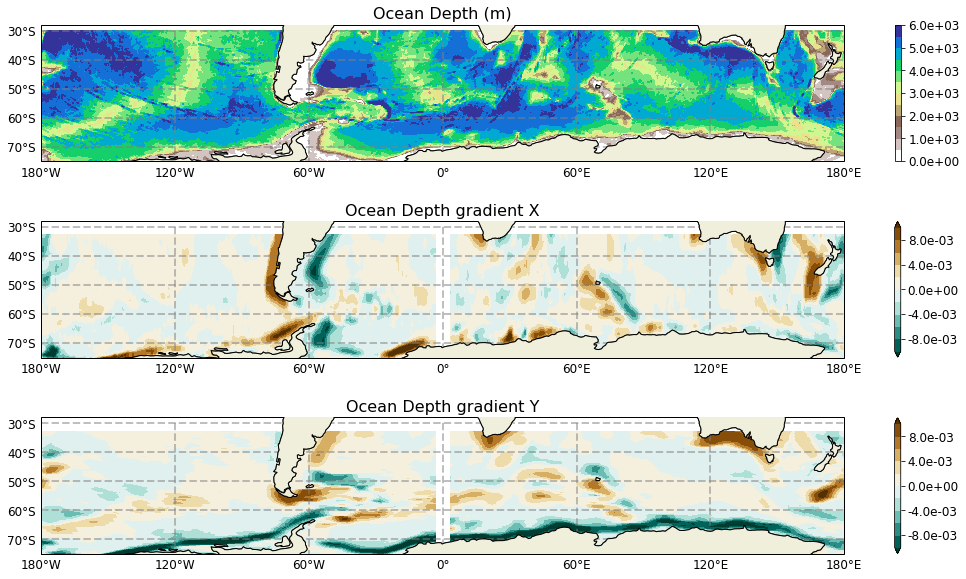

In [17]:
grid = plt.GridSpec(3, 1, wspace=0.4, hspace=0.3)

fig = plt.figure(figsize=[18,10])
ax = fig.add_subplot(grid[0, 0], projection=ccrs.PlateCarree())
_ = SOSE_plot_mono(ax, ds['Depth'], vmin=0, vmax=6000, vstep=500,
                   lon='XC', lat='YC', landcolor=2., cmap='terrain_r', title='Ocean Depth (m)')

ax = fig.add_subplot(grid[1, 0], projection=ccrs.PlateCarree())
_ = SOSE_plot_mono(ax, gradx_depth, vmin=-1e-2, vmax=1e-2, vstep=2e-3,
                   lon='XG', lat='YC', landcolor=2., cmap='BrBG_r', title='Ocean Depth gradient X')

ax = fig.add_subplot(grid[2, 0], projection=ccrs.PlateCarree())
_ = SOSE_plot_mono(ax, grady_depth, vmin=-1e-2, vmax=1e-2, vstep=2e-3,
                   lon='XC', lat='YG', landcolor=2., cmap='BrBG_r', title='Ocean Depth gradient Y')

Text(0, 0.5, 'Depth (m)')

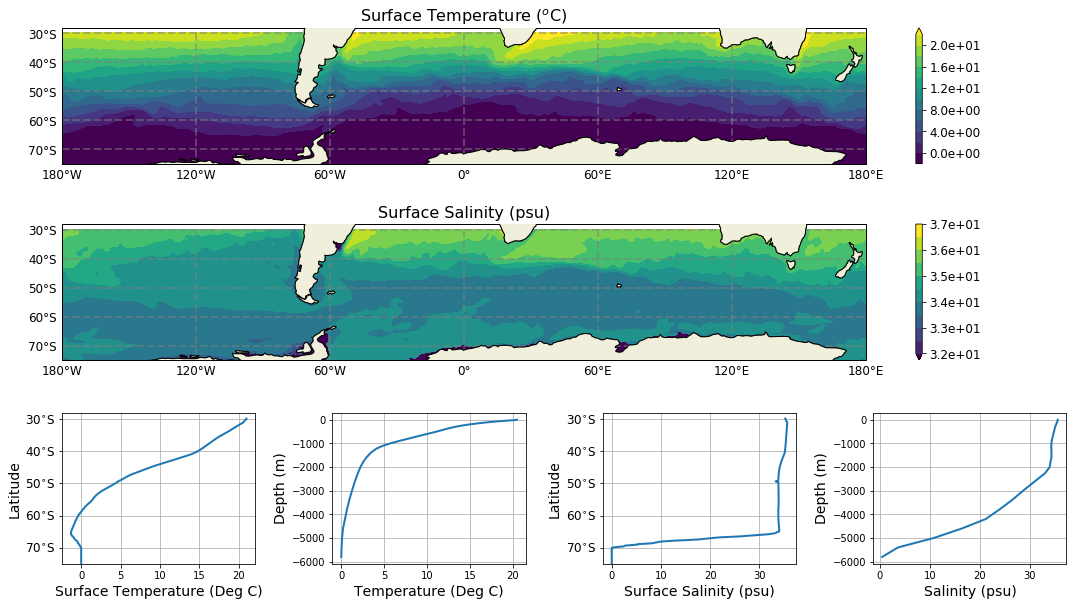

In [32]:
fig = plt.figure(figsize=[18,10])

grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.3)

ax = fig.add_subplot(grid[0, 0:], projection=ccrs.PlateCarree())
_ = SOSE_plot_mono(ax, (ds['THETA'].isel(Z=0)).mean('time'), vmin=-2, vmax=22, vstep=2.,
                   lon='XC', lat='YC', landcolor=2., cmap='viridis', title='Surface Temperature ($^o$C)')

ax = fig.add_subplot(grid[1, 0:], projection=ccrs.PlateCarree())
_ = SOSE_plot_mono(ax, (ds['SALT'].isel(Z=0)).mean('time'), vmin=32, vmax=37, vstep=0.5,
                   lon='XC', lat='YC', landcolor=2., cmap='viridis', title='Surface Salinity (psu)')

ax = fig.add_subplot(grid[2, 0])
ax.plot((ds['THETA'].isel(Z=0).sel(XC = slice(30,110))).mean(['time','XC']),ds['YC'],lw=2)
plt.grid()
plt.yticks([-70, -60, -50, -40, -30], 
           ['70$^{\circ}$S', '60$^{\circ}$S', '50$^{\circ}$S', '40$^{\circ}$S', '30$^{\circ}$S'],fontsize=12)
ax.set_ylim([-75,-28])
ax.set_xlabel('Surface Temperature (Deg C)',fontsize=14)
ax.set_ylabel('Latitude',fontsize=14)

ax = fig.add_subplot(grid[2, 1])
ax.plot((ds['THETA'].sel(XC = slice(30,110), YC=slice(-32,-30))).mean(['time','XC','YC']),ds['Z'],lw=2)
plt.grid()
ax.set_xlabel('Temperature (Deg C)',fontsize=14)
ax.set_ylabel('Depth (m)',fontsize=14)

ax = fig.add_subplot(grid[2, 2])
ax.plot((ds['SALT'].isel(Z=0).sel(XC = slice(30,110))).mean(['time','XC']),ds['YC'],lw=2)
plt.grid()
plt.yticks([-70, -60, -50, -40, -30], 
           ['70$^{\circ}$S', '60$^{\circ}$S', '50$^{\circ}$S', '40$^{\circ}$S', '30$^{\circ}$S'],fontsize=12)
ax.set_ylim([-75,-28])
ax.set_xlabel('Surface Salinity (psu)',fontsize=14)
ax.set_ylabel('Latitude',fontsize=14)

ax = fig.add_subplot(grid[2, 3])
ax.plot((ds['SALT'].sel(XC = slice(30,110), YC=slice(-32,-30))).mean(['time','XC','YC']),ds['Z'],lw=2)
plt.grid()
ax.set_xlabel('Salinity (psu)',fontsize=14)
ax.set_ylabel('Depth (m)',fontsize=14)

Salinity values are very low at depths more than 2 km and close to the continental. These values are not realistic and could be due to bathymetry and continental boundaries. 

$\Large \text{Analyic functions for profiles}$

Analytical profiles are created that resemble the profiles from SOSE shown above. The details of the functions used can be found in the initialization_functions.py file. 

In [9]:
import initialization_functions as infs

X,Y = infs.calc_XYmeters_SOSE(ds.sel(XC = slice(30,110), XG = slice(30,109.9)),center_x = True)

In [10]:
# Vertical grid
nk = 75
max_depth = 4000.
min_depth = 0.
thkcello_topcell = 1.
method = 'powerlaw'

vgrid = infs.calc_vgrid(nk=nk,max_depth=max_depth,min_depth=min_depth,
                        thkcello_topcell=thkcello_topcell,method=method)

<xarray.Dataset>
Dimensions:  (NK: 75, NKp1: 76)
Coordinates:
  * NKp1     (NKp1) float64 0.0 1.0 3.787 8.252 ... 3.798e+03 3.898e+03 4e+03
  * NK       (NK) float64 0.5 2.393 6.02 11.3 ... 3.748e+03 3.848e+03 3.949e+03
Data variables:
    zw       (NKp1) float64 0.0 1.0 3.787 8.252 ... 3.798e+03 3.898e+03 4e+03
    zt       (NK) float64 0.5 2.393 6.02 11.3 ... 3.748e+03 3.848e+03 3.949e+03
    dz       (NK) float64 1.0 2.787 4.465 6.089 ... 98.04 99.31 100.6 101.8


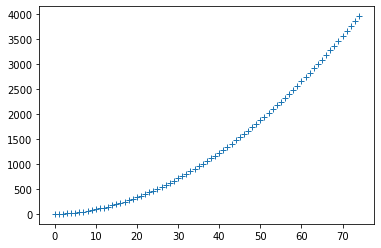

In [11]:
print(vgrid)
plt.plot(vgrid['zt'],'+')

In [12]:
# Wind forcing

sponge_width = [2.,1.]

taux_east = 0.18
taux_west = 0.08
Y0 = Y.isel(lonh =0, lath = np.abs(ds.YC.values + 63.0).argmin()).values # Boundary between ACC/ASF
Lc = Y.isel(lonh =0, lath = np.abs(ds.YC.values + 69.0).argmin()).values # South Zero
sp_wid = np.max(Y.isel(lonh=0).values) - Y.isel(lonh =0, lath = np.abs(ds.YC.values - np.max(Y.lath.values) + 2.).argmin()).values

wind = xr.Dataset()
wind['taux'] = infs.calc_forcing_zonaluniform(Y,function='doublesinusoid_gen',
                                 sponge_width_max = sp_wid,
                                 northsouth_boundary = Y0,
                                 south_zeroregion = Lc, 
                                 max_north = taux_east, 
                                 max_south = taux_west, a=1., b=0.9, c=1., d=1., e=0, f=2.)


In [13]:
# Buoyancy forcing (Heat Flux)

Buo_east = 25. # W/m^2
Buo_west = 18.
Y0 = Y.isel(lonh =0, lath = np.abs(ds.YC.values + 58.0).argmin()).values # Boundary between ACC/ASF
Lc = Y.isel(lonh =0, lath = np.abs(ds.YC.values + 69.0).argmin()).values # South Zero
sp_wid = np.max(Y.isel(lonh=0).values) - Y.isel(lonh =0, lath = np.abs(ds.YC.values - np.max(Y.lath.values) + 2.).argmin()).values

buoyancy = xr.Dataset()
buoyancy['sensible'] = infs.calc_forcing_zonaluniform(Y,function='doublesinusoid_gen',
                                 sponge_width_max = sp_wid,
                                 northsouth_boundary = Y0,
                                 south_zeroregion = Lc, 
                                 max_north = Buo_east, 
                                 max_south = Buo_west, a=1., b=0., c=1., d=1., e=0., f=1.)

buoyancy['sensible_skew'] = infs.calc_forcing_zonaluniform(Y,function='doublesinusoid_gen',
                                 sponge_width_max = sp_wid,
                                 northsouth_boundary = Y0,
                                 south_zeroregion = Lc, 
                                 max_north = Buo_east, 
                                 max_south = Buo_west, a=1., b=1.5, c=1., d=1., e=0., f=1.)

In [33]:
# Fresh water flux and snow flux
Buo_east = -2.4e-5 # kg/m^2s
Buo_west = -1.4e-5
Y0 = Y.isel(lonh =0, lath = np.abs(ds.YC.values + 49.0).argmin()).values # Boundary between ACC/ASF
Lc = Y.isel(lonh =0, lath = np.abs(ds.YC.values + 69.0).argmin()).values # South Zero
sp_wid = np.max(Y.isel(lonh=0).values) - Y.isel(lonh =0, lath = np.abs(ds.YC.values - np.max(Y.lath.values) + 2.).argmin()).values
buoyancy['FW'] = infs.calc_forcing_zonaluniform(Y,function='doublesinusoid_gen',
                                 sponge_width_max = sp_wid,
                                 northsouth_boundary = Y0,
                                 south_zeroregion = Lc, 
                                 max_north = Buo_east, 
                                 max_south = Buo_west, a=2., b=1.0, c=1., d=1., e=-1.5, f=1.)

#Buo_east = -0.e-5; Buo_west = -1.21e-5 # kg/m^2s
#Y0 = Y.isel(lonh =0, lath = np.abs(ds.YC.values + 55.0).argmin()).values # Boundary between ACC/ASF
#Lc = Y.isel(lonh =0, lath = np.abs(ds.YC.values + 70.0).argmin()).values # South Zero
#sp_wid = np.max(Y.isel(lonh=0).values) - Y.isel(lonh =0, lath = np.abs(ds.YC.values - np.max(Y.lath.values) + 2.).argmin()).values
#buoyancy['Snow'] = infs.calc_forcing_zonaluniform(Y,function='doublesinusoid_gen',
#                                 sponge_width_max = sp_wid,
#                                 northsouth_boundary = Y0,
#                                 south_zeroregion = Lc, 
#                                 max_north = Buo_east, 
#                                 max_south = Buo_west, a=1., b=1., c=1., d=1., e=0.9, f=2.)

Buo_east = 2.5e-5; Buo_west = 4.0e-5 # kg/m^2s
Y0 = Y.isel(lonh =0, lath = np.abs(ds.YC.values + 65.0).argmin()).values # Boundary between ACC/ASF
Lc = Y.isel(lonh =0, lath = np.abs(ds.YC.values + 69.0).argmin()).values # South Zero
sp_wid = np.max(Y.isel(lonh=0).values) - Y.isel(lonh =0, lath = np.abs(ds.YC.values - np.max(Y.lath.values) + 27.).argmin()).values
buoyancy['Snow'] = infs.calc_forcing_zonaluniform(Y,function='doublesinusoid_gen',
                                 sponge_width_max = sp_wid,
                                 northsouth_boundary = Y0,
                                 south_zeroregion = Lc, 
                                 max_north = Buo_east, 
                                 max_south = Buo_west, a=2., b=1., c=1., d=2., e=1.0, f=2.)

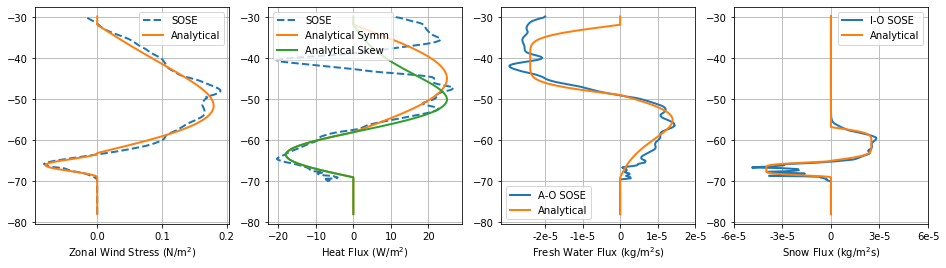

In [34]:
fig = plt.figure(figsize=[16,4])

plt.subplot(1,4,1)
plt.plot(ds['oceTAUX'].sel(XG = slice(30,110)).mean(['time','XG']),ds['YC'],'--',lw=2, label='SOSE')
plt.plot(wind['taux'].isel(lonh=0), wind['lath'],lw=2, label = 'Analytical')
plt.grid()
plt.xlabel('Zonal Wind Stress (N/m$^2$)')
plt.legend()

plt.subplot(1,4,2)
plt.plot((ds['TFLUX']*ds['Depth']/ds['Depth']).sel(XC = slice(30,110)).mean(['time','XC']),ds['YC'],'--',lw=2, label='SOSE')
plt.plot(buoyancy['sensible'].isel(lonh=0), buoyancy['lath'],lw=2,label = 'Analytical Symm')
plt.plot(buoyancy['sensible_skew'].isel(lonh=0), buoyancy['lath'],lw=2,label = 'Analytical Skew')
plt.legend()
plt.xlabel('Heat Flux (W/m$^2$)')
plt.grid()

plt.subplot(1,4,3)
#plt.plot((ds['SIatmFW']).sel(XC = slice(30,110)).mean(['time','XC']),ds['YC'],lw=2, label='SOSE')
plt.plot((A_O).sel(XC = slice(30,110)).mean(['time','XC']),ds['YC'],lw=2, label='A-O SOSE')
plt.plot(buoyancy['FW'].isel(lonh=0), buoyancy['lath'],lw=2,label = 'Analytical')
plt.legend()
plt.xticks([-2e-5, -1e-5, 0, 1e-5, 2e-5], ['-2e-5', '-1e-5', '0', '1e-5','2e-5'])
plt.xlabel('Fresh Water Flux (kg/m$^2$s)')
plt.grid()

plt.subplot(1,4,4)
#plt.plot((ds['SIsnPrcp']).sel(XC = slice(30,110)).mean(['time','XC']),ds['YC'],lw=2, label='SOSE')
plt.plot((I_O).sel(XC = slice(30,110)).mean(['time','XC']),ds['YC'],lw=2, label='I-O SOSE')
plt.plot(buoyancy['Snow'].isel(lonh=0), buoyancy['lath'],lw=2,label = 'Analytical')
plt.xticks([-6e-5, -3e-5, 0, 3e-5, 6e-5], ['-6e-5', '-3e-5', '0', '3e-5','6e-5'])
plt.legend()
plt.xlabel('Fresh Water Flux (kg/m$^2$s)')
plt.grid()

In [35]:
# Temperature and salinity initial conditions
Tn = 22
Ts = 0
Ys = Y.isel(lonh =0, lath = np.abs(ds.YC.values + 43.0).argmin()).values
Ws = 1.e6

TS = xr.Dataset()
TS['SST'] = infs.calc_distribution(coordinate = Y, function='tan_hyperbolic', val_at_maxcoord = Tn, 
                                   val_at_mincoord = Ts, Ys = Ys, Ws = Ws)

#Sn = 34.5
#Ss = 0
#Ys = Y.isel(lonh =0, lath = np.abs(ds.YC.values + 67.5).argmin()).values
#Ws = 1.2e5

Sn = 35.3
Ss = 33.9
Ys = Y.isel(lonh =0, lath = np.abs(ds.YC.values + 43.0).argmin()).values
Ws = 2.5e5

TS['SSS'] = infs.calc_distribution(coordinate = Y, function='tan_hyperbolic', val_at_maxcoord = Sn, 
                                   val_at_mincoord = Ss, Ys = Ys, Ws = Ws)

# Extend temperature and salinity in the vertical
TS['T'] = (infs.calc_distribution(coordinate=-vgrid.zt, function = 'exponential', val_at_maxcoord = TS['SST']*0.95, efolding = 800) + 
           infs.calc_distribution(coordinate=-vgrid.zt, function = 'linear', val_at_maxcoord = TS['SST']*0.05, val_at_mincoord = TS['SST']*0.025)) 
TS['S'] = (np.minimum(infs.calc_distribution(coordinate=-vgrid.zt, function = 'linear', val_at_maxcoord = TS['SSS'] + 12, val_at_mincoord = TS['SSS'] - 12),
          infs.calc_distribution(coordinate=-vgrid.zt, function = 'linear', val_at_maxcoord = TS['SSS'], val_at_mincoord = TS['SSS']-2)))

In [37]:
"""
SOSE_T = (ds['THETA'].isel(Z=0).sel(XC = slice(30,110))).mean(['time','XC']).compute()
SOSE_S = (ds['SALT'].isel(Z=0).sel(XC = slice(30,110))).mean(['time','XC']).compute()
#SOSE_T1 = (ds['THETA'].isel(Z=5).sel(XC = slice(30,110))).mean(['time','XC']).compute()
#SOSE_S1 = (ds['SALT'].isel(Z=5).sel(XC = slice(30,110))).mean(['time','XC']).compute()
SOSE_Tz = (ds['THETA'].sel(XC = slice(30,110), YC=slice(-32,-30))).mean(['time','XC','YC']).compute()
SOSE_Sz = (ds['SALT'].sel(XC = slice(30,110), YC=slice(-32,-30))).mean(['time','XC','YC']).compute()
"""

"\nSOSE_T = (ds['THETA'].isel(Z=0).sel(XC = slice(30,110))).mean(['time','XC']).compute()\nSOSE_S = (ds['SALT'].isel(Z=0).sel(XC = slice(30,110))).mean(['time','XC']).compute()\n#SOSE_T1 = (ds['THETA'].isel(Z=5).sel(XC = slice(30,110))).mean(['time','XC']).compute()\n#SOSE_S1 = (ds['SALT'].isel(Z=5).sel(XC = slice(30,110))).mean(['time','XC']).compute()\nSOSE_Tz = (ds['THETA'].sel(XC = slice(30,110), YC=slice(-32,-30))).mean(['time','XC','YC']).compute()\nSOSE_Sz = (ds['SALT'].sel(XC = slice(30,110), YC=slice(-32,-30))).mean(['time','XC','YC']).compute()\n"

In [38]:
# Salinity vertical profiles have errors. Look at MOM6 notebook instead

"""
fig = plt.figure(figsize=[18,4])
plt.subplot(1,4,1)
plt.plot(TS['SST'].isel(lonh=0),TS.lath,label='Analytical')
plt.plot(SOSE_T,ds['YC'],lw=2, label='SOSE')
plt.xlabel('Temperature')
plt.legend()
plt.grid()

plt.subplot(1,4,2)
plt.plot(TS['SSS'].isel(lonh=0),TS.lath,label='Analytical')
plt.plot(SOSE_S,ds['YC'],lw=2, label='SOSE')
plt.xlabel('Salinity')
plt.xlim((32.,38.))
plt.legend()
plt.grid()

plt.subplot(1,4,3)
plt.plot(TS['T'].isel(lonh=0).sel(lath=slice(-32,-30)).mean('lath'),-TS.NK,label='Analytical')
plt.plot(SOSE_Tz,ds['Z'],lw=2, label='SOSE')
plt.xlabel('Temperature')
plt.ylabel('Level (m)')
plt.legend()
plt.grid()

plt.subplot(1,4,4)
plt.plot(TS['S'].isel(lonh=0).sel(lath=slice(-32,-30)).mean('lath'),-TS.NK,label='Analytical')
plt.plot(SOSE_Sz,ds['Z'],lw=2, label='SOSE')
plt.xlabel('Salinity (psu)')
plt.ylabel('Level (m)')
plt.legend()
plt.grid()
"""

"\nfig = plt.figure(figsize=[18,4])\nplt.subplot(1,4,1)\nplt.plot(TS['SST'].isel(lonh=0),TS.lath,label='Analytical')\nplt.plot(SOSE_T,ds['YC'],lw=2, label='SOSE')\nplt.xlabel('Temperature')\nplt.legend()\nplt.grid()\n\nplt.subplot(1,4,2)\nplt.plot(TS['SSS'].isel(lonh=0),TS.lath,label='Analytical')\nplt.plot(SOSE_S,ds['YC'],lw=2, label='SOSE')\nplt.xlabel('Salinity')\nplt.xlim((32.,38.))\nplt.legend()\nplt.grid()\n\nplt.subplot(1,4,3)\nplt.plot(TS['T'].isel(lonh=0).sel(lath=slice(-32,-30)).mean('lath'),-TS.NK,label='Analytical')\nplt.plot(SOSE_Tz,ds['Z'],lw=2, label='SOSE')\nplt.xlabel('Temperature')\nplt.ylabel('Level (m)')\nplt.legend()\nplt.grid()\n\nplt.subplot(1,4,4)\nplt.plot(TS['S'].isel(lonh=0).sel(lath=slice(-32,-30)).mean('lath'),-TS.NK,label='Analytical')\nplt.plot(SOSE_Sz,ds['Z'],lw=2, label='SOSE')\nplt.xlabel('Salinity (psu)')\nplt.ylabel('Level (m)')\nplt.legend()\nplt.grid()\n"

In [39]:
ds.close()